### Data Loading and Transformation
###### EXCEL -> LARNAKA AIRPORT DAILY AIR TRAFFIC 2018 - 2019

In [1]:
import pandas as pd
path = '../datasets/cyprus_airport_air_traffic/excel/'
path_csv = '../datasets/cyprus_airport_air_traffic/CSV/'

sheet_names = ['JAN','FEB','MAR','APR','MAY','JUNE','JULY','AUG','SEP','OCT','NOV','DEC']
columns = ['DATE'
           ,'INT ARRIVALS 04','INT ARRIVALS 22','INT ARRIVALS TTL'
           ,'INT DEPARTURES 04','INT DEPARTURES 22','INT DEPARTURES TTL'
           ,'LOCAL ARRIVALS 04','LOCAL ARRIVALS 22','LOCAL ARRIVALS TTL'
           ,'LOCAL DEPARTURES 04','LOCAL DEPARTURES 22','LOCAL DEPARTURES TTL'
           ,'TRANSITS FXD','TRANSITS HEL','TRANSITS TTL'
           ,'HELI LND','HELI TO','HELI TTL'
           ,'T/G','Grant Total','International Flights','Local Flights (Fixed/Heli)'
           ,'YEAR'
           ,'MONTH']


sheets = []
for y in ([2018,2019]):
    for m in sheet_names:
        twk = pd.read_excel(path+'LARNAKA AIRPORT DAILY AIR TRAFFIC '+str(y)+'.xlsx', usecols = 'B:X',skiprows = 3, header=0, sheet_name = m)
        twk['YEAR'] = y
        twk['MONTH'] = m
        twk.columns = columns
        #twk = twk.set_index('DATE')
        sheets.append(twk)

workbook = pd.concat(sheets, axis=0)
workbook

,DATE,INT ARRIVALS 04,INT ARRIVALS 22,INT ARRIVALS TTL,INT DEPARTURES 04,INT DEPARTURES 22,INT DEPARTURES TTL,LOCAL ARRIVALS 04,LOCAL ARRIVALS 22,LOCAL ARRIVALS TTL,...,TRANSITS TTL,HELI LND,HELI TO,HELI TTL,T/G,Grant Total,International Flights,Local Flights (Fixed/Heli),YEAR,MONTH
0,1,0.0,41.0,41.0,0.0,42.0,42.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,83.0,83.0,0.0,2018,JAN
1,2,0.0,49.0,49.0,0.0,49.0,49.0,0.0,13.0,13.0,...,2.0,1.0,1.0,2.0,35.0,163.0,98.0,28.0,2018,JAN
2,3,0.0,63.0,63.0,0.0,61.0,61.0,0.0,6.0,6.0,...,2.0,3.0,3.0,6.0,11.0,155.0,124.0,18.0,2018,JAN
3,4,0.0,57.0,57.0,1.0,54.0,55.0,0.0,9.0,9.0,...,1.0,3.0,3.0,6.0,5.0,142.0,112.0,24.0,2018,JAN
4,5,47.0,10.0,57.0,46.0,12.0,58.0,8.0,0.0,8.0,...,1.0,2.0,2.0,4.0,12.0,148.0,115.0,20.0,2018,JAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,0.0,66.0,66.0,0.0,62.0,62.0,0.0,8.0,8.0,...,0.0,3.0,3.0,6.0,18.0,168.0,128.0,22.0,2019,DEC
28,29,0.0,58.0,58.0,0.0,68.0,68.0,0.0,0.0,0.0,...,0.0,3.0,3.0,6.0,0.0,132.0,126.0,6.0,2019,DEC
29,30,0.0,59.0,59.0,0.0,60.0,60.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,119.0,119.0,0.0,2019,DEC
30,31,0.0,48.0,48.0,0.0,47.0,47.0,0.0,12.0,12.0,...,1.0,0.0,0.0,0.0,24.0,144.0,95.0,24.0,2019,DEC


In [2]:
workbook = workbook.copy()
workbook['MONTH'] = workbook['MONTH'].apply(lambda x: 'JUN' if x=='JUNE' else x)
workbook['MONTH'] = workbook['MONTH'].apply(lambda x: 'JUL' if x=='JULY' else x)
workbook = workbook.loc[workbook['DATE'] != 'TTL']
workbook['DATE_FORMAT'] = (workbook['DATE'].astype(str) + '-' + workbook['MONTH'].astype(str) + '-' + workbook['YEAR'].astype(str))
workbook['DATE_FORMAT'] = pd.to_datetime(workbook['DATE_FORMAT'], format='%d-%b-%Y', infer_datetime_format=True, errors='coerce')
workbook = workbook.loc[~workbook['DATE_FORMAT'].isna()]
workbook = workbook.set_index('DATE_FORMAT')

In [3]:
workbook.to_csv(path_csv+'LARNAKA AIRPORT DAILY AIR TRAFFIC_2018-2019.csv', header=True)
workbook['Grant Total'].to_csv(path_csv+'LARNAKA AIRPORT DAILY AIR TRAFFIC_2018-2019 TOTAL.csv', header=True)

###### EXCEL -> LARNAKA AIRPORT DAILY AIR TRAFFIC 2020 - 2021

In [4]:
sheet_names = ['JAN','FEB','MAR','APR','MAY','JUNE','JULY','AUG','SEP','OCT','NOV','DEC']
columns = ['DATE'
           ,'INT ARRIVALS 04','INT ARRIVALS 22','INT ARRIVALS TTL'
           ,'INT DEPARTURES 04','INT DEPARTURES 22','INT DEPARTURES TTL'
           ,'TRANSIT','NA1'
           ,'LOCAL G/A','LOCAL STATE','LOCAL T/G','NA2'
           ,'INTERNATIONAL TTL','TRANSIT TTL','LOCAL TTL'
           ,'Grant Total'
           ,'YEAR'
           ,'MONTH']


sheets = []
for y in ([2020,2021]):
    for m in sheet_names:
        twk = pd.read_excel(path+'LARNAKA AIRPORT DAILY AIR TRAFFIC '+str(y)+'.xlsx', usecols = 'A:Q',skiprows = 6, header=0, sheet_name = m)
        twk['YEAR'] = y
        twk['MONTH'] = m
        twk.columns = columns
        #twk = twk.set_index('DATE')
        sheets.append(twk)

workbook = pd.concat(sheets, axis=0)
workbook

,DATE,INT ARRIVALS 04,INT ARRIVALS 22,INT ARRIVALS TTL,INT DEPARTURES 04,INT DEPARTURES 22,INT DEPARTURES TTL,TRANSIT,NA1,LOCAL G/A,LOCAL STATE,LOCAL T/G,NA2,INTERNATIONAL TTL,TRANSIT TTL,LOCAL TTL,Grant Total,YEAR,MONTH
0,1,10.0,38.0,48.0,11.0,36.0,47.0,2.0,NaN,0.0,0.0,0.0,NaN,95.0,2.0,0.0,97.0,2020,JAN
1,2,4.0,60.0,64.0,2.0,63.0,65.0,1.0,NaN,4.0,1.0,1.0,NaN,129.0,1.0,5.0,135.0,2020,JAN
2,3,0.0,55.0,55.0,1.0,53.0,54.0,2.0,NaN,2.0,1.0,7.0,NaN,109.0,2.0,3.0,114.0,2020,JAN
3,4,0.0,67.0,67.0,0.0,66.0,66.0,2.0,NaN,13.0,0.0,18.0,NaN,133.0,2.0,13.0,148.0,2020,JAN
4,5,0.0,63.0,63.0,22.0,63.0,85.0,0.0,NaN,4.0,1.0,0.0,NaN,148.0,0.0,5.0,153.0,2020,JAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,36.0,5.0,41.0,41.0,0.0,41.0,0.0,NaN,11.0,2.0,24.0,NaN,82.0,0.0,12.0,94.0,2021,DEC
28,29,47.0,0.0,47.0,52.0,0.0,52.0,0.0,NaN,8.0,0.0,18.0,NaN,99.0,0.0,10.0,109.0,2021,DEC
29,30,30.0,23.0,53.0,28.0,23.0,51.0,0.0,NaN,1.0,0.0,0.0,NaN,104.0,0.0,1.0,105.0,2021,DEC
30,31,24.0,9.0,33.0,23.0,13.0,36.0,0.0,NaN,0.0,0.0,0.0,NaN,69.0,0.0,0.0,69.0,2021,DEC


In [5]:
workbook = workbook.copy()
workbook['MONTH'] = workbook['MONTH'].apply(lambda x: 'JUN' if x=='JUNE' else x)
workbook['MONTH'] = workbook['MONTH'].apply(lambda x: 'JUL' if x=='JULY' else x)
workbook = workbook.loc[workbook['DATE'] != 'TTL']
workbook['DATE_FORMAT'] = (workbook['DATE'].astype(str) + '-' + workbook['MONTH'].astype(str) + '-' + workbook['YEAR'].astype(str))
workbook['DATE_FORMAT'] = pd.to_datetime(workbook['DATE_FORMAT'], format='%d-%b-%Y', infer_datetime_format=True, errors='coerce')
workbook = workbook.loc[~workbook['DATE_FORMAT'].isna()]
workbook = workbook.set_index('DATE_FORMAT')

In [6]:
workbook.to_csv(path_csv+'LARNAKA AIRPORT DAILY AIR TRAFFIC_2020-2021.csv', header=True)
workbook['Grant Total'].to_csv(path_csv+'LARNAKA AIRPORT DAILY AIR TRAFFIC_2020-2021 TOTAL.csv', header=True)

###### EXCEL -> PAPHS AIRPORT DAILY AIR TRAFFIC 2018 - 2021

In [7]:
import pandas as pd
path = '../datasets/cyprus_airport_air_traffic/excel/'

sheet_names = ['JAN','FEB','MAR','APR','MAY','JUNE','JULY','AUG','SEP','OCT','NOV','DEC']
columns = ['DATE'
           ,'INT ARRIVALS 04','INT ARRIVALS 22','INT ARRIVALS TTL'
           ,'INT DEPARTURES 04','INT DEPARTURES 22','INT DEPARTURES TTL'
           ,'LOCAL ARRIVALS 04','LOCAL ARRIVALS 22','LOCAL ARRIVALS TTL'
           ,'LOCAL DEPARTURES 04','LOCAL DEPARTURES 22','LOCAL DEPARTURES TTL'
           ,'TRANSITS FXD','TRANSITS HEL','TRANSITS TTL'
           ,'HELI LND','HELI TO','HELI TTL'
           ,'T/G','Grant Total'
           ,'YEAR'
           ,'MONTH']


sheets = []
for y in ([2018,2019,2020,2021]):
    for m in sheet_names:
        twk = pd.read_excel(path+'PAFOS AIRPORT DAILY AIR TRAFFIC '+str(y)+'.xlsx', usecols = 'A:U',skiprows = 3, header=0, sheet_name = m)
        twk['YEAR'] = y
        twk['MONTH'] = m
        twk.columns = columns
        #twk = twk.set_index('DATE')
        sheets.append(twk)

workbook = pd.concat(sheets, axis=0)
workbook

,DATE,INT ARRIVALS 04,INT ARRIVALS 22,INT ARRIVALS TTL,INT DEPARTURES 04,INT DEPARTURES 22,INT DEPARTURES TTL,LOCAL ARRIVALS 04,LOCAL ARRIVALS 22,LOCAL ARRIVALS TTL,...,TRANSITS FXD,TRANSITS HEL,TRANSITS TTL,HELI LND,HELI TO,HELI TTL,T/G,Grant Total,YEAR,MONTH
0,1,1.0,7.0,8,0.0,8.0,8,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0,0.0,16,2018,JAN
1,2,1.0,10.0,11,0.0,10.0,10,0.0,2.0,2,...,0.0,0.0,0,0.0,0.0,0,0.0,25,2018,JAN
2,3,11.0,9.0,20,6.0,15.0,21,1.0,0.0,1,...,0.0,0.0,0,5.0,5.0,10,0.0,53,2018,JAN
3,4,1.0,11.0,12,0.0,11.0,11,0.0,0.0,0,...,0.0,0.0,0,2.0,2.0,4,0.0,27,2018,JAN
4,5,1.0,7.0,8,0.0,10.0,10,0.0,1.0,1,...,0.0,0.0,0,0.0,0.0,0,0.0,20,2018,JAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,4.0,18.0,22,0.0,23.0,23,0.0,7.0,7,...,1.0,0.0,1,5.0,5.0,10,0.0,70,2021,DEC
28,29,22.0,2.0,24,17.0,5.0,22,1.0,1.0,2,...,1.0,0.0,1,7.0,7.0,14,1.0,66,2021,DEC
29,30,18.0,0.0,18,18.0,1.0,19,2.0,0.0,2,...,0.0,0.0,0,3.0,3.0,6,0.0,47,2021,DEC
30,31,19.0,0.0,19,21.0,0.0,21,1.0,0.0,1,...,0.0,0.0,0,0.0,0.0,0,0.0,42,2021,DEC


In [8]:
workbook = workbook.copy()
workbook['MONTH'] = workbook['MONTH'].apply(lambda x: 'JUN' if x=='JUNE' else x)
workbook['MONTH'] = workbook['MONTH'].apply(lambda x: 'JUL' if x=='JULY' else x)
workbook = workbook.loc[workbook['DATE'] != 'TTL']
workbook['DATE_FORMAT'] = (workbook['DATE'].astype(str) + '-' + workbook['MONTH'].astype(str) + '-' + workbook['YEAR'].astype(str))
workbook['DATE_FORMAT'] = pd.to_datetime(workbook['DATE_FORMAT'], format='%d-%b-%Y', infer_datetime_format=True, errors='coerce')
workbook = workbook.loc[~workbook['DATE_FORMAT'].isna()]
workbook = workbook.set_index('DATE_FORMAT')

In [9]:
workbook.to_csv(path_csv+'PAFOS AIRPORT DAILY AIR TRAFFIC_2018-2021.csv', header=True)
workbook['Grant Total'].to_csv(path_csv+'PAFOS AIRPORT DAILY AIR TRAFFIC_2018-2021 TOTAL.csv', header=True)

###### Merge all Total and create new CSV to be used for analysis





In [53]:
import pandas as pd
import numpy as np


df1 = pd.read_csv(path_csv+"LARNAKA AIRPORT DAILY AIR TRAFFIC_2018-2019 TOTAL.csv")
df2 = pd.read_csv(path_csv+"LARNAKA AIRPORT DAILY AIR TRAFFIC_2020-2021 TOTAL.csv")
df = pd.concat([df1,df2])
df['airport'] = 'Larnaka'
# use the same station code with air quality for easy join
df['station_code'] = 5 

df3 = pd.read_csv(path_csv+"PAFOS AIRPORT DAILY AIR TRAFFIC_2018-2021 TOTAL.csv")
df3['airport'] = 'Pafos'
# use the same station code with air quality for easy join
df3['station_code'] = 15

df = pd.concat([df,df3])

df = df.rename(columns={'DATE_FORMAT':'date'})
df = df.rename(columns={'Grant Total':'total_flights'})
df = df.set_index('date')
print(df.shape)

### Save the filepath_csv+
df.to_csv(path_csv+ "CYPRUS_AIRPORTS_DAILY_AIR_TRAFFIC_2018_2021_TOTAL.csv", header=True)
df.head()

(2922, 3)


,total_flights,airport,station_code
date,,,
2018-01-01,83.0,Larnaka,5
2018-01-02,163.0,Larnaka,5
2018-01-03,155.0,Larnaka,5
2018-01-04,142.0,Larnaka,5
2018-01-05,148.0,Larnaka,5


###### Load older CSV file and convert to same format and merge

In [54]:
import glob
import pandas as pd

# Get data file names
fileprefix = 'LARNAKA INTERNATIONAL AIRPORT AIR TRAFFIC CONTROL DAILY TRAFFIC'
filenames = glob.glob(path_csv + "*"+fileprefix+"*.csv")
columns = ['DAY','MONTH','MONTH','FLIGHT_CATEGORY','INBOUND_FLIGHTS','OUTBOUND_FLIGHTS','TOTAL_FLIGHTS']

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
    
df = pd.concat(dfs, axis=0, ignore_index=True)
df['airport'] = 'Larnaka'
df['station_code'] = 5 
df['date'] = (df['DAY'].astype(str) + '-' + df['MONTH'].astype(str) + '-' + df['YEAR'].astype(str))
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y', infer_datetime_format=True, errors='coerce').dt.date
df = df.groupby(['date','airport','station_code'])['TOTAL_FLIGHTS'].sum()
df = df.reset_index().rename(columns={'TOTAL_FLIGHTS':'total_flights'}).set_index('date')

#load Total file for merge
df_total = pd.read_csv(path_csv+"CYPRUS_AIRPORTS_DAILY_AIR_TRAFFIC_2018_2021_TOTAL.csv").set_index('date')
print(df_total.shape)
df_total = pd.concat([df,df_total], axis=0)
print(df_total.shape)

### Save the filepath_csv+
df_total.to_csv(path_csv+ "CYPRUS_AIRPORTS_DAILY_AIR_TRAFFIC_2018_2021_TOTAL.csv", header=True)

(2922, 3)
(5114, 3)


In [57]:
import glob
import pandas as pd

# Get data file names
fileprefix = 'PAFOS*NTERNATIONAL AIRPORT AIR TRAFFIC CONTROL DAILY TRAFFIC'
filenames = glob.glob(path_csv + "*"+fileprefix+"*.csv")
columns = ['DAY','MONTH','MONTH','FLIGHT_CATEGORY','INBOUND_FLIGHTS','OUTBOUND_FLIGHTS','TOTAL_FLIGHTS']

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

df = pd.concat(dfs, axis=0, ignore_index=True)
df = pd.concat(dfs, axis=0, ignore_index=True)
df['airport'] = 'Pafos'
df['station_code'] = 15

df['date'] = (df['DAY'].astype(str) + '-' + df['MONTH'].astype(str) + '-' + df['YEAR'].astype(str))
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y', infer_datetime_format=True, errors='coerce').dt.date
df = df.groupby(['date','airport','station_code'])['TOTAL_FLIGHTS'].sum()
df = df.reset_index().rename(columns={'TOTAL_FLIGHTS':'total_flights'}).set_index('date')
print(df.shape)
#load Total file for merge
df_total = pd.read_csv(path_csv+"CYPRUS_AIRPORTS_DAILY_AIR_TRAFFIC_2018_2021_TOTAL.csv").set_index('date')
print(df_total.shape)
df_total = pd.concat([df,df_total], axis=0)
print(df_total.shape)

### Save the filepath_csv+
df_total.to_csv(path_csv+ "CYPRUS_AIRPORTS_DAILY_AIR_TRAFFIC_2018_2021_TOTAL.csv", header=True)

(2192, 3)
(5114, 3)
(7306, 3)


#### Plot the data to check

<AxesSubplot:ylabel='date'>

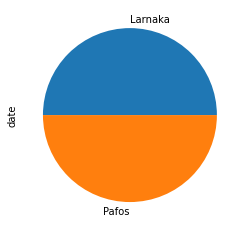

In [64]:
df_total = pd.read_csv(path_csv+"CYPRUS_AIRPORTS_DAILY_AIR_TRAFFIC_2018_2021_TOTAL.csv")
df_total.groupby('airport').count()['date'].plot.pie()

<AxesSubplot:xlabel='year'>

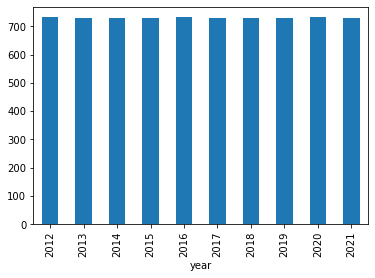

In [72]:
df_total['date'] = pd.to_datetime(df_total['date'])
df_total['year'] = df_total['date'].dt.strftime('%Y')
df_total.groupby(['year']).count()['date'].plot.bar()